__1)__ Façam a análise exploratória sobre a base de dados _mpg_, levante eventuais _outliers_, olhe para a consistência de dados e crie visualizações que achar necessárias.<br><br>

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Carregando o conjunto de dados
mpg = sns.load_dataset('mpg')

# Visualizando as primeiras linhas do conjunto de dados
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
# Informações gerais sobre o conjunto de dados
print(mpg.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


Há elementos nulos na coluna da potência do carro.

In [5]:
# Estatísticas descritivas
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


C:\Users\Amanda Rodrigues\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Amanda Rodrigues\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\Amanda Rodrigues\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Amanda Rodrigues\AppData\Local\Packages\Python

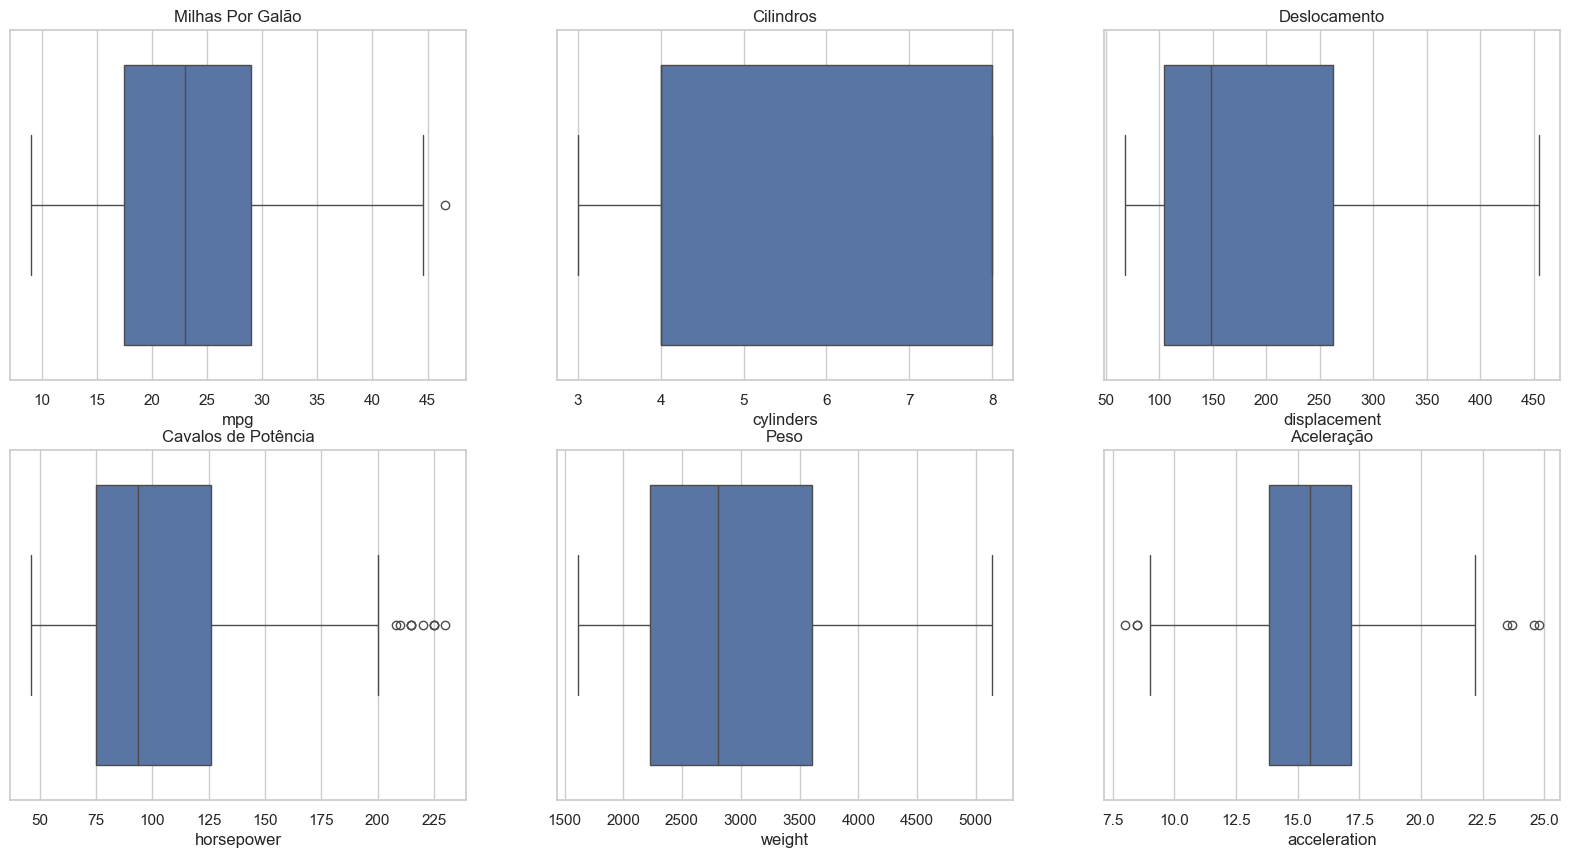

In [33]:
# Verificando a presença de outliers

sns.set(style="whitegrid")
fig, ax = plt.subplots(2,3, figsize = ( 20, 10))
sns.boxplot(x=mpg['mpg'], ax = ax[0,0],orient="v")
ax[0,0].set_title("Milhas Por Galão")
sns.boxplot(x=mpg['cylinders'], ax = ax[0,1],orient="v")
ax[0,1].set_title("Cilindros")
sns.boxplot(x=mpg['displacement'], ax = ax[0,2],orient="v")
ax[0,2].set_title("Deslocamento")

sns.boxplot(x=mpg['horsepower'], ax = ax[1,0],orient="v")
ax[1,0].set_title("Cavalos de Potência")
sns.boxplot(x=mpg['weight'], ax = ax[1,1],orient="v")
ax[1,1].set_title("Peso")
sns.boxplot(x=mpg['acceleration'], ax = ax[1,2],orient="v")
ax[1,2].set_title("Aceleração")

plt.show()



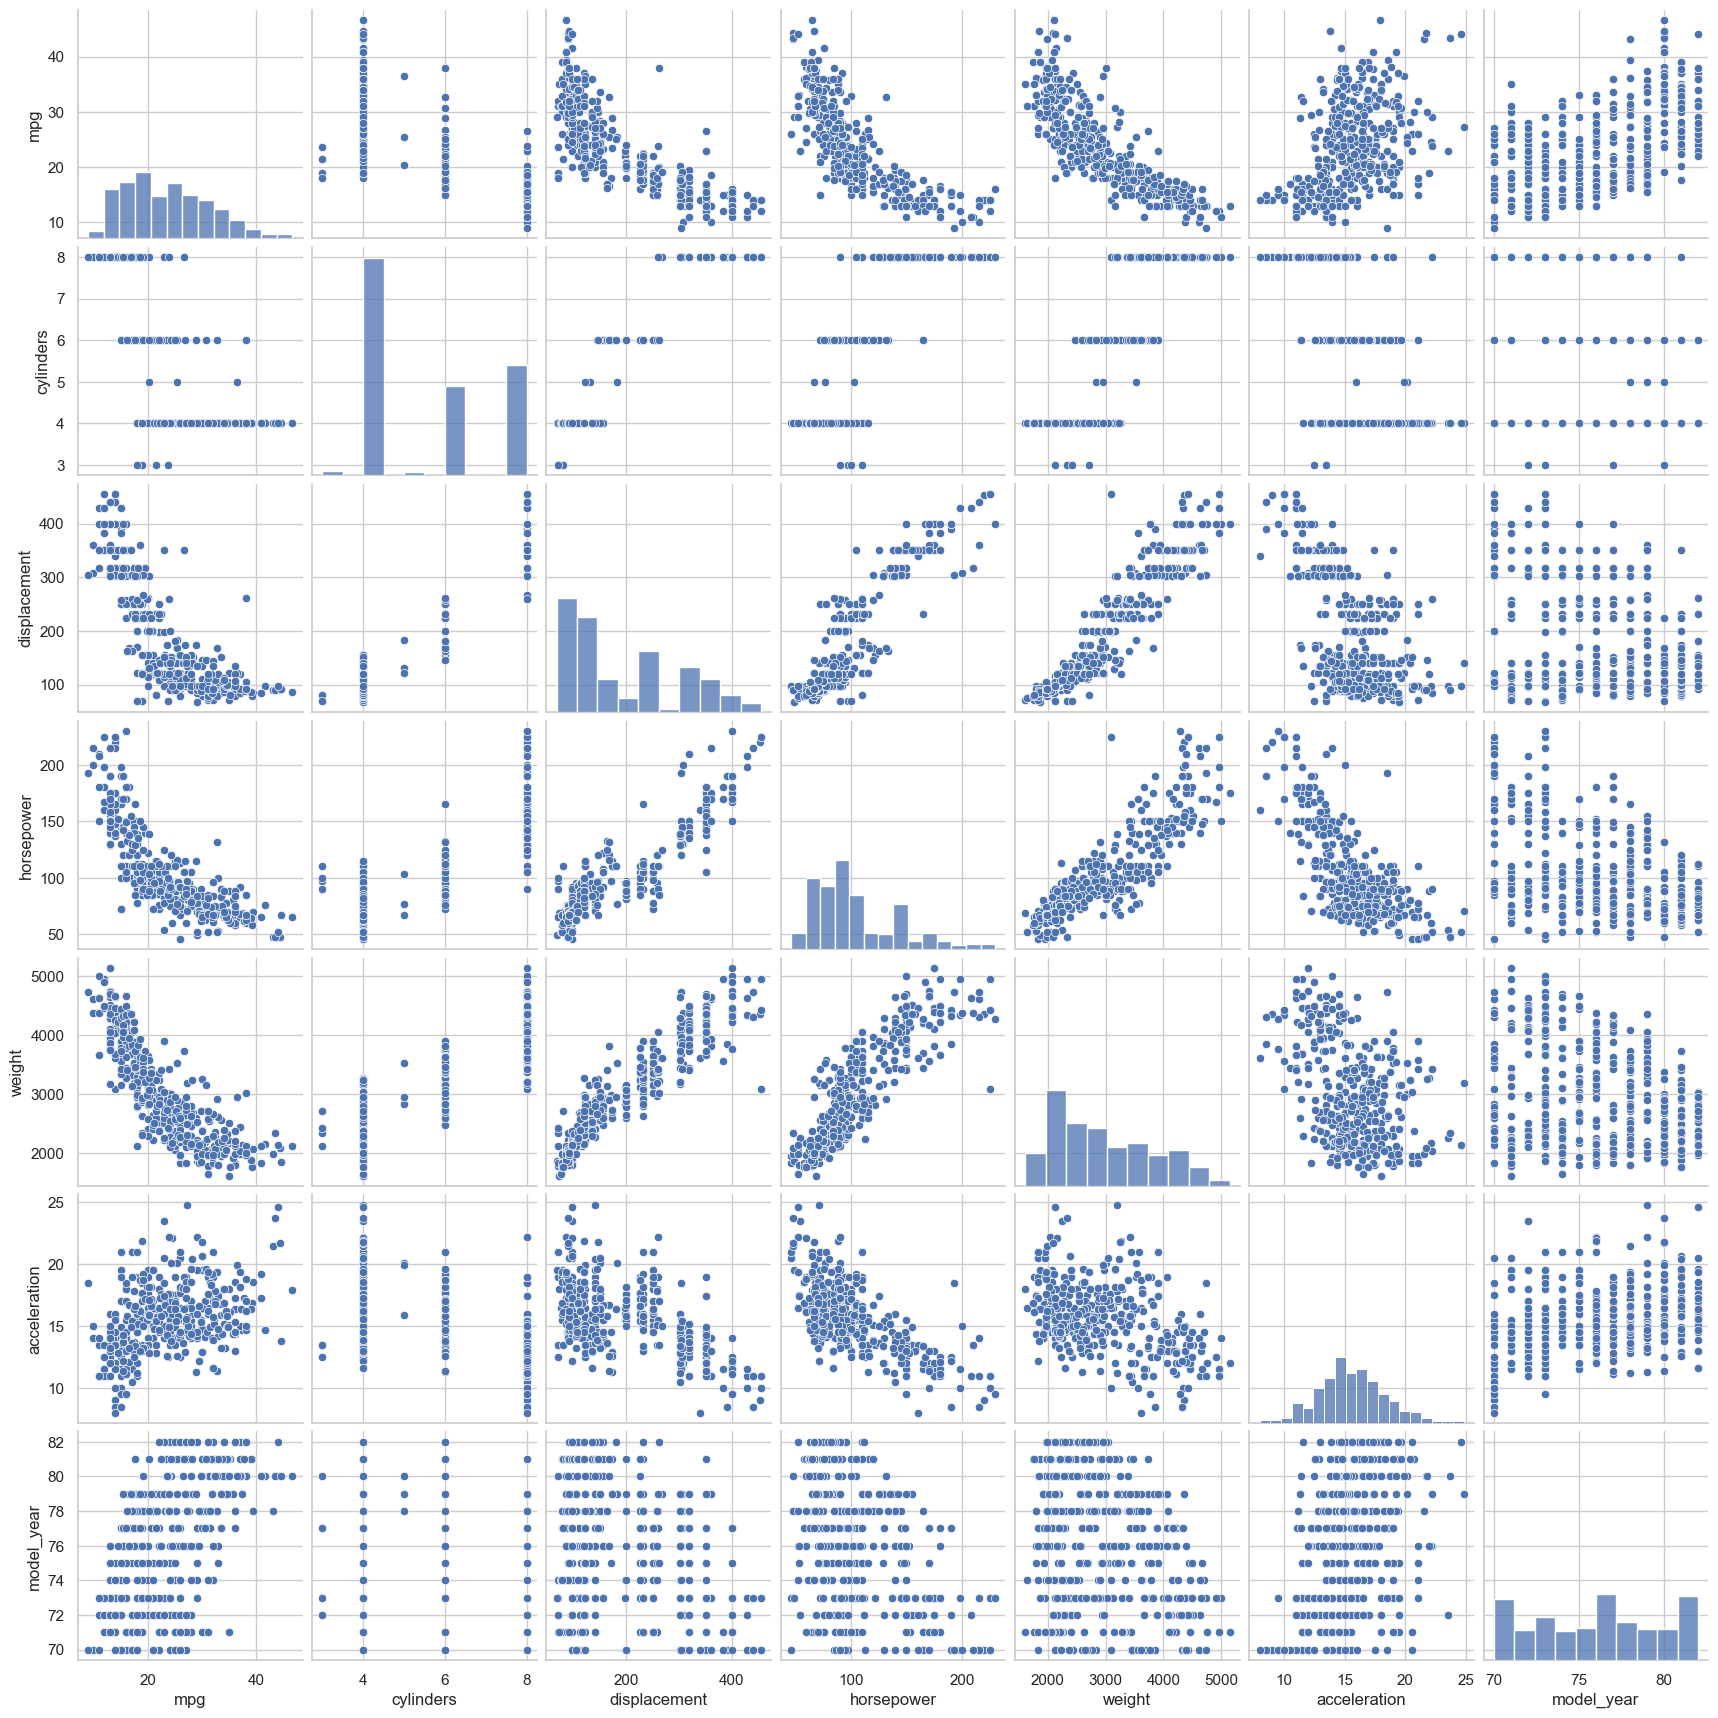

In [7]:
# Verificando a consistência dos dados
sns.pairplot(mpg)
plt.show()

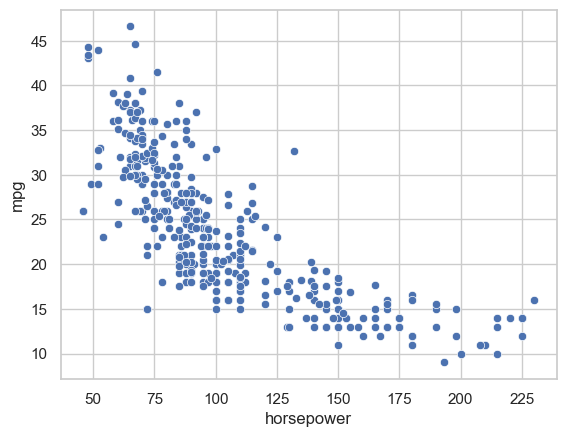

In [22]:
# Criando outras visualizações conforme necessário
# Exemplo: relações entre variáveis específicas
sns.scatterplot(x='horsepower', y='mpg', data=mpg)
plt.show()


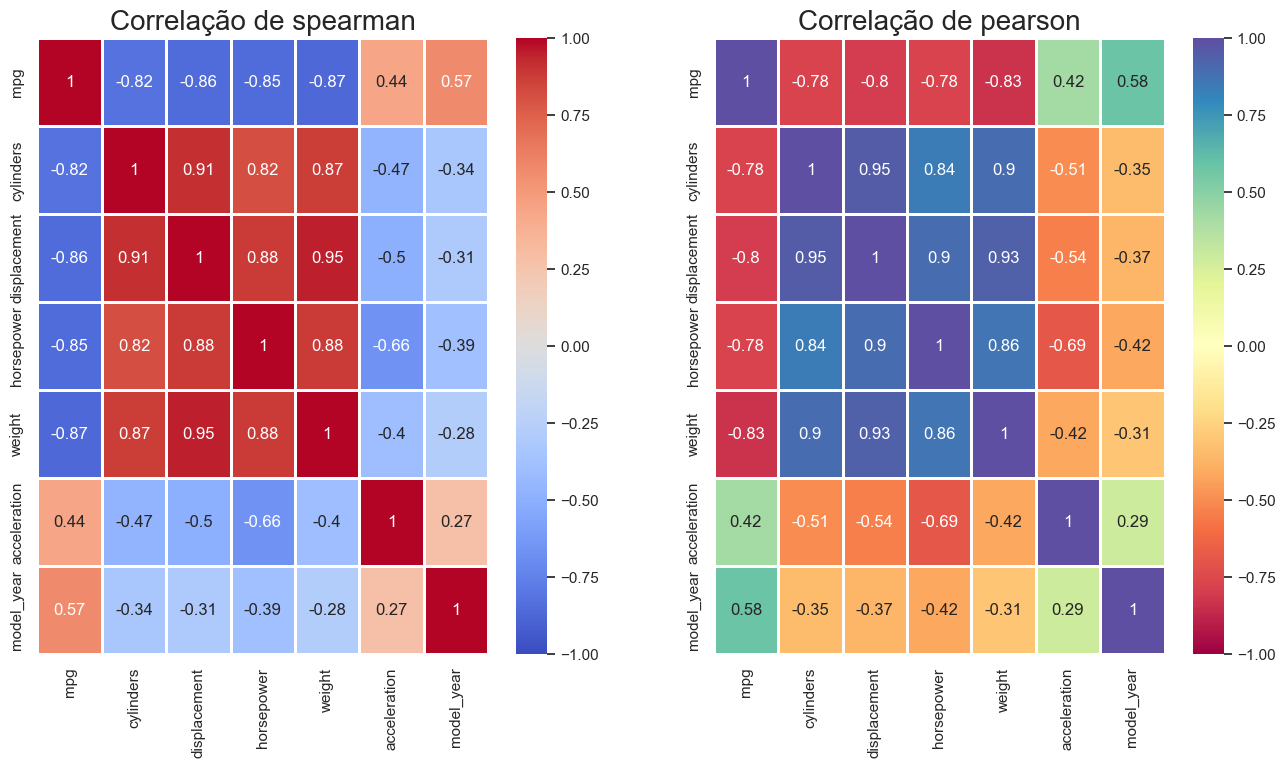

In [37]:
mpg_numerico = mpg.select_dtypes(include = np.number)
fig, ax = plt.subplots(1,2, figsize = ( 16,8))
sns.heatmap(mpg_numerico.corr(method = "spearman"), ax = ax[0], 
            annot = True, cmap='coolwarm', linewidths=.8,
            vmin=-1, vmax=1)
sns.heatmap(mpg_numerico.corr(method = "pearson"), ax = ax[1], 
            annot = True, cmap = "Spectral", linewidths= .8,
            vmin=-1, vmax=1)
ax[1].set_title("Correlação de pearson", fontsize=20)
ax[0].set_title("Correlação de spearman", fontsize=20)
plt.show()


In [9]:
mpg_numerico.cov()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,61.089611,-10.308911,-655.402318,-233.857926,-5505.211745,9.058930,16.741163
cylinders,-10.308911,2.893415,168.623214,55.348244,1290.695575,-2.370842,-2.193499
displacement,-655.402318,168.623214,10872.199152,3614.033744,82368.423240,-156.332976,-142.717137
horsepower,-233.857926,55.348244,3614.033744,1481.569393,28265.620231,-73.186967,-59.036432
weight,-5505.211745,1290.695575,82368.423240,28265.620231,717140.990526,-974.899011,-959.946344
acceleration,9.058930,-2.370842,-156.332976,-73.186967,-974.899011,7.604848,2.938105
model_year,16.741163,-2.193499,-142.717137,-59.036432,-959.946344,2.938105,13.672443


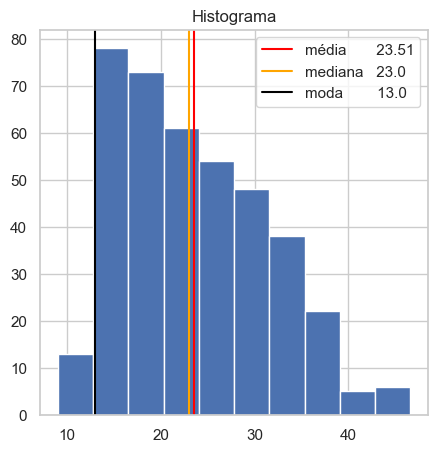

In [32]:
media = mpg_numerico['mpg'].mean()
mediana = mpg_numerico['mpg'].median()
dp = mpg_numerico['mpg'].std()
fig, ax = plt.subplots(figsize = (5,5)) 
ax.hist(mpg_numerico['mpg'])
ax.axvline(x = media, label =   f'média       {round(media,2)}', color = 'red')
ax.axvline(x = mediana, label = f'mediana   {round(mediana,2)}', color = 'orange')
moda = mpg_numerico['mpg'].mode()[0]
ax.axvline(x = moda, label =    f'moda        {round(moda,2)}', color = 'black')
ax.set_title("Histograma") 
ax.legend()
plt.show()

In [26]:
mpg_numerico['mpg'].mode()

0    13.0
Name: mpg, dtype: float64